In [7]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
with open('corpus_data.txt', 'r', encoding='utf-8') as file:
   content = file.read()


In [16]:
clean_text = re.sub(r'[^\w\s]|[\d]', '', content)

In [17]:
document = re.sub('[a-zA-Z]', '', clean_text)

In [19]:
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(document):
    temp = []
 
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)

In [39]:
model1 = gensim.models.Word2Vec(data, min_count=1,vector_size=100, window=20, workers=6)
model1.save("rlc_corpus.model")

In [9]:
model = gensim.models.Word2Vec.load("rlc_corpus.model")

In [31]:
model_min_1000 = gensim.models.Word2Vec(data, min_count=1000,vector_size=100, window=20, workers=6)
model_min_1000.save("rlc_corpus_min5.model")

In [44]:
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,window=20, sg=1)
model2.save("rlc_corpus_sg.model")

In [33]:
print(model1)

Word2Vec<vocab=113018, vector_size=100, alpha=0.025>


In [84]:
print(model1.wv.similarity('выбрать', 'выбирать'))

-0.03112531


In [60]:
print(model2.wv.similarity('делать', 'сделать'))

0.99482906


In [51]:
print(model2)

Word2Vec<vocab=113018, vector_size=100, alpha=0.025>


In [81]:
vector = model1.wv['читать']

In [83]:
vector

array([-8.94283876e-03,  4.66068182e-03, -8.52162368e-04,  2.50574807e-03,
       -9.17889271e-03, -1.89900883e-02,  7.57570146e-03,  2.69451402e-02,
        1.85802032e-03, -3.21649644e-03,  1.26967123e-02, -5.96243935e-03,
        8.95698741e-03,  1.36454869e-02, -8.47878307e-03, -1.44076589e-02,
       -1.13144447e-03, -1.29706170e-02, -4.28543799e-03, -1.52855767e-02,
        1.04068611e-02,  2.43242574e-03,  1.51798511e-02,  6.21437933e-03,
        6.90066256e-03, -6.94233575e-04, -6.78785378e-03, -5.63451042e-03,
       -4.03736066e-03,  4.00279043e-03,  2.56106053e-02, -5.36159193e-03,
       -1.02718361e-02, -2.42652409e-02,  1.43249764e-03,  1.36595694e-02,
       -8.85728467e-03, -9.10008966e-04, -1.82896350e-02, -2.51630414e-02,
       -5.78868249e-03, -1.35786254e-02, -6.52876869e-03, -1.79663730e-05,
       -5.07317157e-03,  6.26400299e-03, -2.19023153e-02,  7.43036019e-03,
       -8.90854560e-03, -5.16678020e-03,  1.01916753e-02, -1.05979918e-02,
       -9.25452914e-03, -

In [66]:
similar_words = model2.wv.most_similar('читать', topn=10)

In [68]:
similar_words

[('ж', 0.9992007613182068),
 ('моему', 0.9991405010223389),
 ('слушать', 0.9990915656089783),
 ('слишком', 0.9990667700767517),
 ('трудно', 0.9990125298500061),
 ('хорошо', 0.9988759756088257),
 ('информацию', 0.9988513588905334),
 ('некоторыми', 0.9988427758216858),
 ('плакат', 0.9988385438919067),
 ('известно', 0.9988353252410889)]

In [89]:
result = model1.wv.most_similar(positive=['выбрать', 'выбрал'], negative=['чувство'], topn=1)

In [91]:
result

[('цель', 0.6268457174301147)]

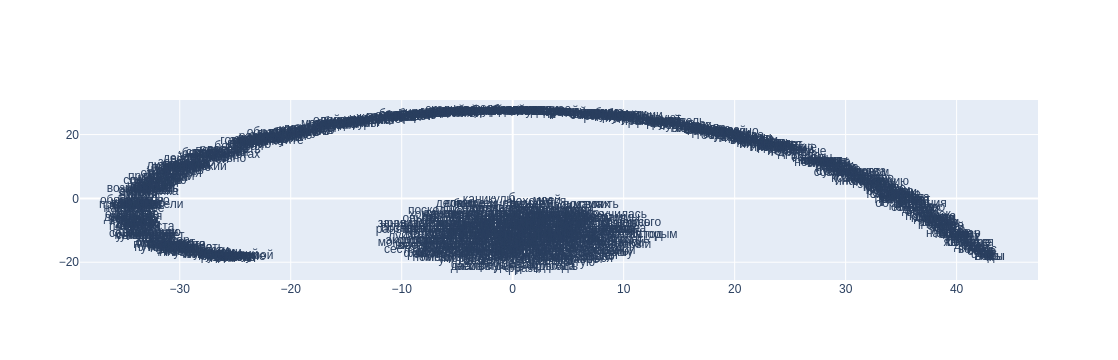

In [35]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model_min_1000.wv.vectors)
    labels = np.asarray(model_min_1000.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model_min_1000)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(24, 24))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)